In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("profiles.csv")
#print(df.head())

In [3]:
# Can drink, diet, drugs, smokes and offspring be used to predict body type?

print(df.body_type.value_counts())
print('----')
print(df.drinks.value_counts())
print('----')
print(df.diet.value_counts())
print('----')
print(df.drugs.value_counts())
print('----')
print(df.smokes.value_counts())
print('----')
print(df.offspring.value_counts())

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
----
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64
----
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly kosher           18
strictly halal            18
halal                     11
kosher                    

In [4]:
bodytype_mapping = {'rather not say':0, 'overweight':1, 'full figured':2, 'used up': 3, 'a little extra':4, 'curvy':5, 'average':6, 'skinny':7, 'thin':8, 'jacked':9, 'fit':10, 'athletic':11, np.NaN:12}
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5, np.NaN:6}
diet_mapping = {'strictly other':0,'other':1, 'mostly other':2, 'strictly vegan':3, 'vegan':4, 'mostly vegan':5, 'strictly vegetarian':6, 'vegetarian':7, 'mostly vegetarian':8, 'strictly halal':9, 'halal':10, 'mostly halal':11, 'strictly kosher':12, 'kosher':13, 
                'mostly kosher':14, 'strictly anything':15, 'anything':16, 'mostly anything':17, np.NaN:18}
drug_mapping = {'never':0, 'sometimes':1, 'often':2, np.NaN:3}
smoke_mapping = {'no':0, 'when drinking':1, 'sometimes':2, 'trying to quit':3, 'yes':4, np.NaN:5}
kids_mapping = {'doesn&rsquo;t have kids, and doesn&rsquo;t want any':0, 'doesn&rsquo;t want kids':1, 'doesn&rsquo;t have kids, but might want them':2, 'doesn&rsquo;t have kids':3, 'doesn&rsquo;t have kids, but wants them':4, 'might want kids':5, 'wants kids':6, 'has a kid, but doesn&rsquo;t want more': 7, 
                'has a kid, and might want more':8, 'has a kid':9, 'has a kid, and wants more':10, 'has kids, but doesn&rsquo;t want more':11, 'has kids, and might want more':12, 'has kids':13, 'has kids, and wants more':14, np.NaN:15}

bodytype = pd.DataFrame({'type':df.body_type.map(bodytype_mapping)})
data = pd.DataFrame({'drinks':df.drinks.map(drink_mapping),
                    'diet':df.diet.map(diet_mapping),
                    'drugs':df.drugs.map(drug_mapping),
                    'smokes':df.smokes.map(smoke_mapping),
                    'kids':df.offspring.map(kids_mapping)})
print(bodytype.head())
print(data.head())

   type
0     4
1     6
2     8
3     8
4    11
   drinks  diet  drugs  smokes  kids
0       2    15      0       2     2
1       3     2      1       0     2
2       2    16      3       0    15
3       2     7      3       0     1
4       2    18      0       0    15


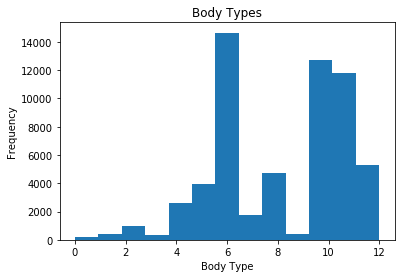

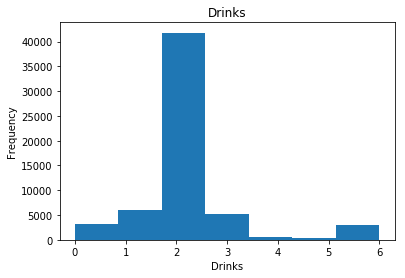

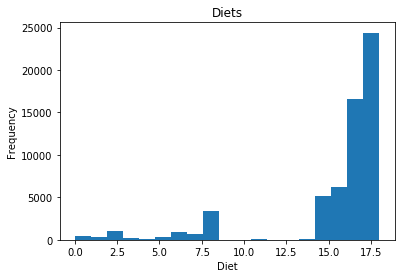

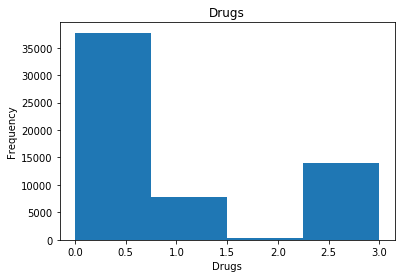

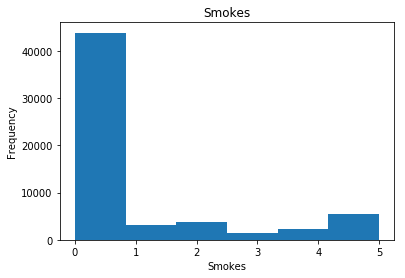

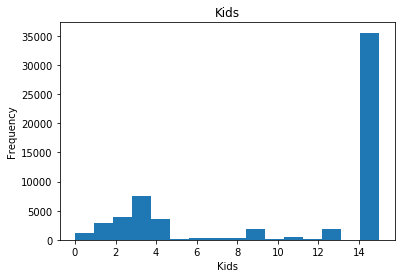

In [11]:
plt.hist(bodytype['type'],bins = 13)
plt.xlabel('Body Type')
plt.ylabel('Frequency')
plt.title('Body Types')
plt.show()
plt.hist(data['drinks'],bins = 7)
plt.xlabel('Drinks')
plt.ylabel('Frequency')
plt.title('Drinks')
plt.show()
plt.hist(data['diet'], bins = 19)
plt.xlabel('Diet')
plt.ylabel('Frequency')
plt.title('Diets')
plt.show()
plt.hist(data['drugs'], bins = 4)
plt.xlabel('Drugs')
plt.ylabel('Frequency')
plt.title('Drugs')
plt.show()
plt.hist(data['smokes'], bins = 6)
plt.xlabel('Smokes')
plt.ylabel('Frequency')
plt.title('Smokes')
plt.show()
plt.hist(data['kids'], bins = 16)
plt.xlabel('Kids')
plt.ylabel('Frequency')
plt.title('Kids')
plt.show()

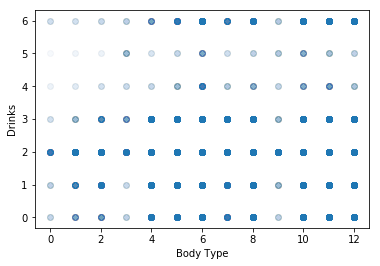

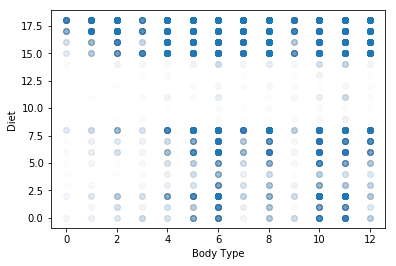

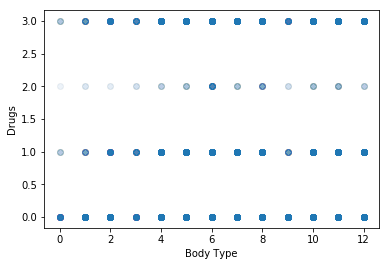

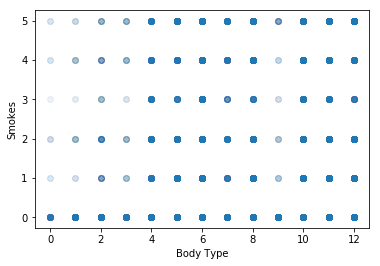

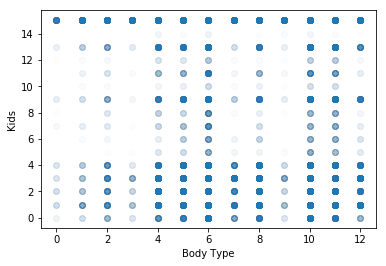

In [6]:
plt.scatter(bodytype['type'], data['drinks'], alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Drinks')
plt.show()
plt.scatter(bodytype['type'], data['diet'], alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Diet')
plt.show()
plt.scatter(bodytype['type'], data['drugs'], alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Drugs')
plt.show()
plt.scatter(bodytype['type'], data['smokes'], alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Smokes')
plt.show()
plt.scatter(bodytype['type'], data['kids'], alpha = 0.01)
plt.xlabel('Body Type')
plt.ylabel('Kids')
plt.show()

C:\Users\connor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\connor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\connor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\connor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

90


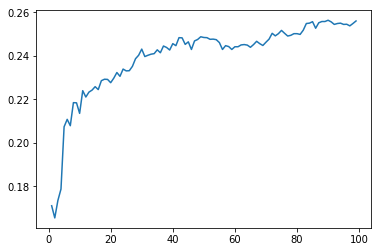

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train, test, trainl, testl = train_test_split(data, bodytype, train_size = 0.8, test_size = 0.2, random_state = 0)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

labels = testl
best = 0.2
bestn = 0
neighbors =[]
accuracy = []
for i in range(1,100):
    clsif = KNeighborsClassifier(n_neighbors = i)
    clsif.fit(train, trainl)
    guesses = clsif.predict(test)
    score = accuracy_score(labels, guesses)
    neighbors.append(i)
    accuracy.append(score)
    if score > best:
        bestn = i
        best = score
print(bestn)

plt.plot(neighbors, accuracy)
plt.show()

In [8]:
clsif = KNeighborsClassifier(n_neighbors = bestn)
clsif.fit(train, trainl)
guesses = clsif.predict(test)
print(bestn)


print(accuracy_score(labels.values.tolist(), guesses.tolist()))
print(clsif.predict([[4,16,0,0,0],[16,4,3,3,3],[1,1,1,1,1],[5,18,2,4,16]]))

C:\Users\connor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


90
0.2563803169307756
[10  6  6 12]


In [9]:
bodytn0 = []
drink0 = []
diet0 = []
drug0 = []
smoke0 = []
kids0 = []

drink1 = []
diet1 = []
drug1 = []
smoke1 = []
kids1 = []


for i in range(len(bodytype['type'])):
    if bodytype.type[i] < 12:
        bodytn0.append(bodytype.type[i])
        drink0.append(data.drinks[i])
        diet0.append(data.diet[i])
        drug0.append(data.drugs[i])
        smoke0.append(data.smokes[i])
        kids0.append(data.kids[i])
    else:
        drink1.append(data.drinks[i])
        diet1.append(data.diet[i])
        drug1.append(data.drugs[i])
        smoke1.append(data.smokes[i])
        kids1.append(data.kids[i])

bodytype_known = pd.DataFrame({'type':bodytn0})
data_known = pd.DataFrame({'drinks':drink0,
                    'diet':diet0,
                    'drugs':drug0,
                    'smokes':smoke0,
                    'kids':kids0})

data_unknown = pd.DataFrame({'drinks':drink1,
                    'diet':diet1,
                    'drugs':drug1,
                    'smokes':smoke1,
                    'kids':kids1})


In [10]:
from sklearn.neighbors import KNeighborsClassifier

'''print(data_known)
print(bodytype_known)
print(data_unknown)'''

clsif = KNeighborsClassifier(n_neighbors = bestn)
clsif.fit(data_known, bodytype_known)
result = pd.DataFrame({'bodytype':clsif.predict(data_unknown)})
#print(result)
print(result.bodytype.value_counts())

C:\Users\connor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


6     2370
10    1951
11     956
8       19
Name: bodytype, dtype: int64
